In [1]:
# If you don't have wget, please first install it
# Let's download the dataset first
!wget http://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat

URL transformed to HTTPS due to an HSTS policy
--2023-10-10 11:46:12--  https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat
Resolving spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)... 169.154.154.63
Connecting to spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)|169.154.154.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175388160 (167M)
Saving to: 'omni2_all_years.dat.1'

omni2_all_years.dat 100%[===================>] 167.26M  13.3MB/s    in 13s     

2023-10-10 11:46:25 (13.1 MB/s) - 'omni2_all_years.dat.1' saved [175388160/175388160]



In [ ]:
# columns 1, 2, 3 giving the year, day of year (DOY), and hour of day of each measurement
# column 40: the sunspot number (R) - the number of spots on the surface of the Sun, indicating how active it is
# column 41: the Dst index - an hourly magnetic activity index measured at Earth’s surface, in nT
# column 51: the F10.7 index - the radio flux at 10.7cm (i.e. how bright the Sun is at that wavelength), in “solar flux units” (sfu)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Let's take a quick look the first line of data file
with open("omni2_all_years.dat") as f:
    print(f.readline())

1963   1  0 1771 99 99 999 999 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 999.9 9999999. 999.9 9999. 999.9 999.9 9.999 99.99 9999999. 999.9 9999. 999.9 999.9 9.999 999.99 999.99 999.9  7  33    -6  119 999999.99 99999.99 99999.99 99999.99 99999.99 99999.99  0   3 999.9 999.9 99999 99999 99.9



In [4]:
# It’s a pretty unfriendly file with the column names explained in the other file, 
# so we have to do some careful work to load the data and ensure we know what is what. 
# Some pandas magic to load it is this (there are also other ways):
df = pd.read_csv("omni2_all_years.dat",
                 delim_whitespace=True,
                 usecols=[0, 1, 2, 39, 40, 50],
                 names=["Year", "DOY", "Hour", "R", "Dst", "F10.7"])

In [5]:
df.head()

,Year,DOY,Hour,R,Dst,F10.7
0,1963,1,0,33,-6,999.9
1,1963,1,1,33,-5,999.9
2,1963,1,2,33,-5,999.9
3,1963,1,3,33,-3,999.9
4,1963,1,4,33,-3,999.9


In [6]:
df.tail()

,Year,DOY,Hour,R,Dst,F10.7
534715,2023,365,19,999,99999,999.9
534716,2023,365,20,999,99999,999.9
534717,2023,365,21,999,99999,999.9
534718,2023,365,22,999,99999,999.9
534719,2023,365,23,999,99999,999.9


## Creating a datetime index

In [ ]:
# Let's change the index from its current state as a sequence of integers
# to the more functional pandas.DatetimeIndex which is based on Python datetime objects

In [ ]:
# We use the pandas.to_datetime() function to create the new index from the 
# “Year”, “DOY”, and “Hour” columns, then assign it directly to 
# the .index property of df, then drop the unneeded columns:

In [7]:
df.index = pd.to_datetime(df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"], format="%Y%j%H")
df = df.drop(columns=["Year", "DOY", "Hour"])

In [8]:
# df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"] combines the columns into 
# one column of fixed-width numbers following the [YearDOYHour] pattern that 
# can be parsed by the "%Y%j%H" format specifier. 
df.head()

,R,Dst,F10.7
1963-01-01 00:00:00,33,-6,999.9
1963-01-01 01:00:00,33,-5,999.9
1963-01-01 02:00:00,33,-5,999.9
1963-01-01 03:00:00,33,-3,999.9
1963-01-01 04:00:00,33,-3,999.9


In [9]:
# In this dataset, data gaps have been infilled with 9’s. 
# We can replace these occurrences with NaN:
df = df.replace({"R":999,
                 "Dst":99999,
                 "F10.7":999.9}, np.nan)

In [10]:
df.head()

,R,Dst,F10.7
1963-01-01 00:00:00,33.0,-6.0,NaN
1963-01-01 01:00:00,33.0,-5.0,NaN
1963-01-01 02:00:00,33.0,-5.0,NaN
1963-01-01 03:00:00,33.0,-3.0,NaN
1963-01-01 04:00:00,33.0,-3.0,NaN


In [11]:
# It’s good practice to perform a few checks on the data. 
# For instance, is the data really sampled every hour? Are there any gaps?
# We can check this:
print("Dataframe shape: ", df.shape)
dt = (df.index[-1] - df.index[0])
print("Number of hours between start and end dates: ", dt.total_seconds()/3600 + 1)

Dataframe shape:  (534720, 3)
Number of hours between start and end dates:  534720.0


In [12]:
# We are dealing with over 55 years of hourly samples that results in 
# about half a million records:
h, d, y = 24, 365, 55
print(f"{h} hours/day * {d} days/year * {y} years = {h*d*y} hours")

24 hours/day * 365 days/year * 55 years = 481800 hours


## Plotting dataframe contents

<AxesSubplot:>

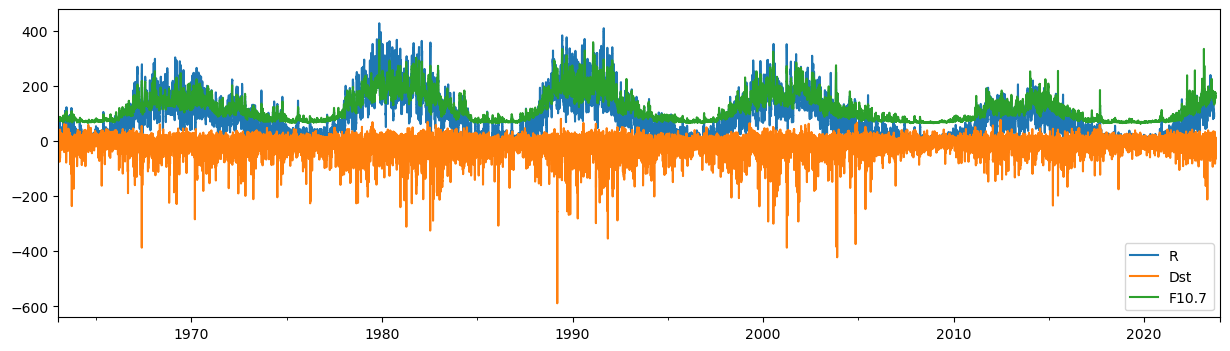

In [13]:
df.plot(figsize=(15,4))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

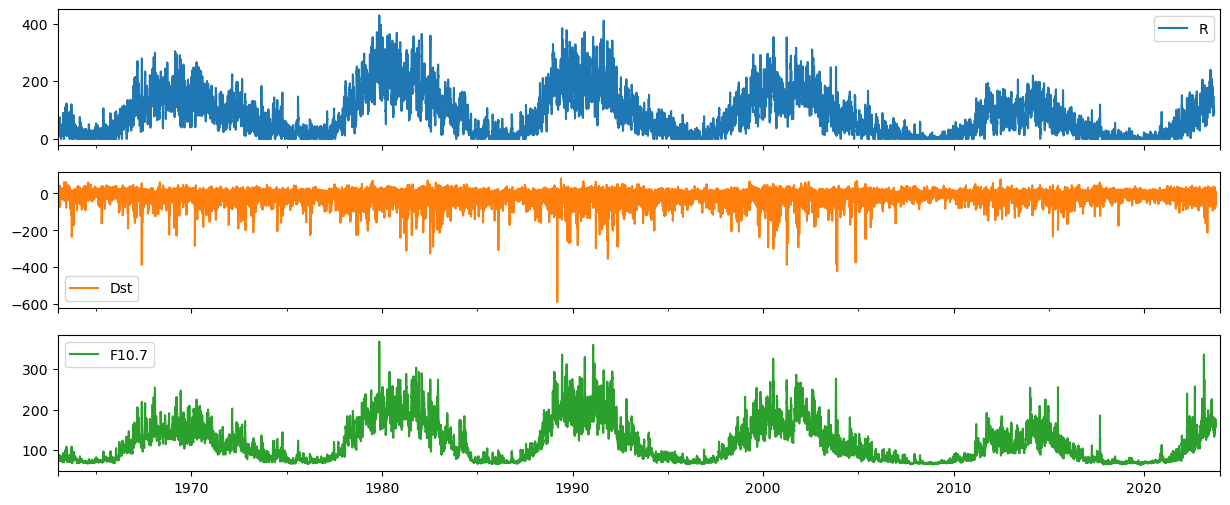

In [14]:
df.plot(subplots=True, figsize=(15,6))

<AxesSubplot:>

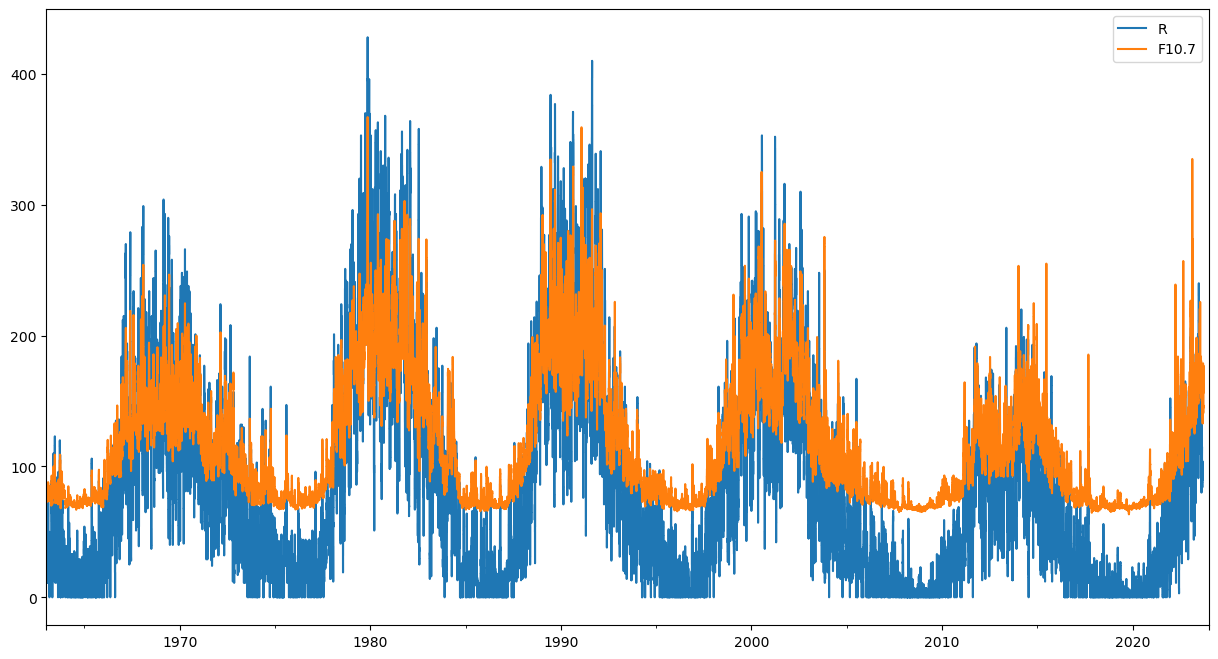

In [15]:
df.plot(y=["R", "F10.7"], figsize=(15,8))

<AxesSubplot:xlabel='R'>

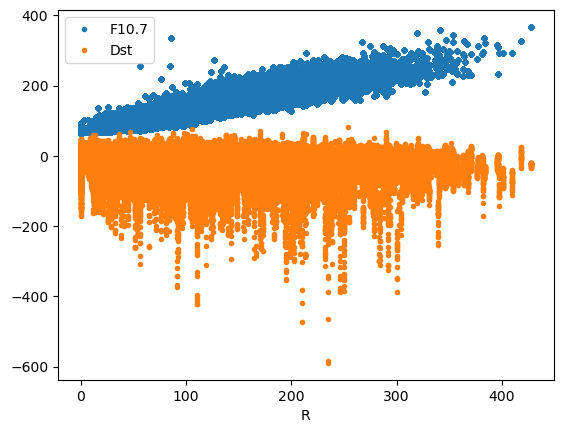

In [16]:
df.plot(x="R", y=["F10.7", "Dst"], style='.')

## Resampling, rolling calculations, and differencing

<AxesSubplot:>

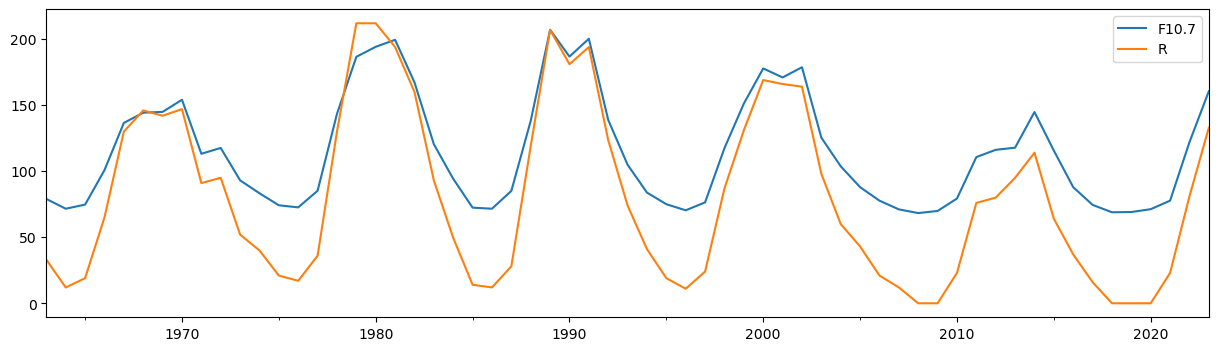

In [17]:
# To reduce the noise in the data, we can smooth it. 
# There are various ways to do this and so there is a choice 
# to be made about the method to use and the degree of smoothing required. 
# pandas offers a convenient way to reduce the data cadence by resampling 
# with the .resample() method:
df[["F10.7", "R"]].resample("1y").median().plot(figsize=(15,4))

<AxesSubplot:>

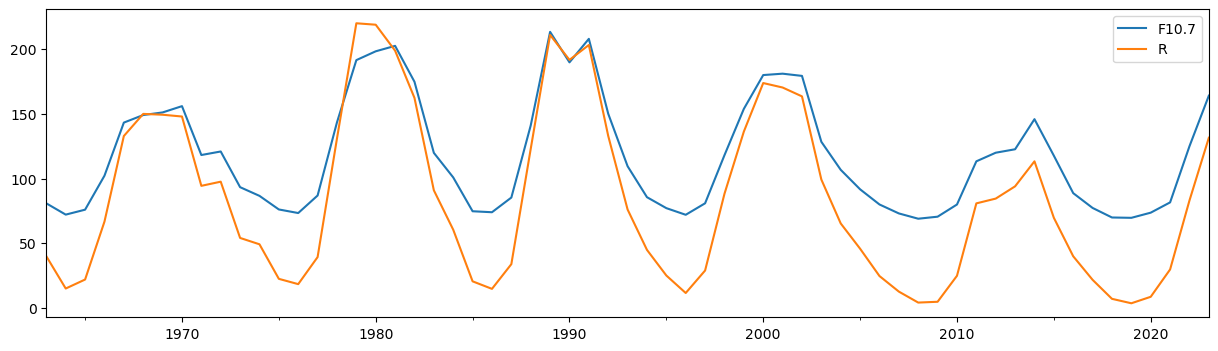

In [18]:
df[["F10.7", "R"]].resample("1y").mean().plot(figsize=(15,4))

In [ ]:
# Here we have extracted a dataframe with the columns we are interested in with
# df[["F10.7", "R"]], produced a year-based “resampler” object, which is 
# then reduced to the new yearly time series by taking medians over each year interval.

<AxesSubplot:>

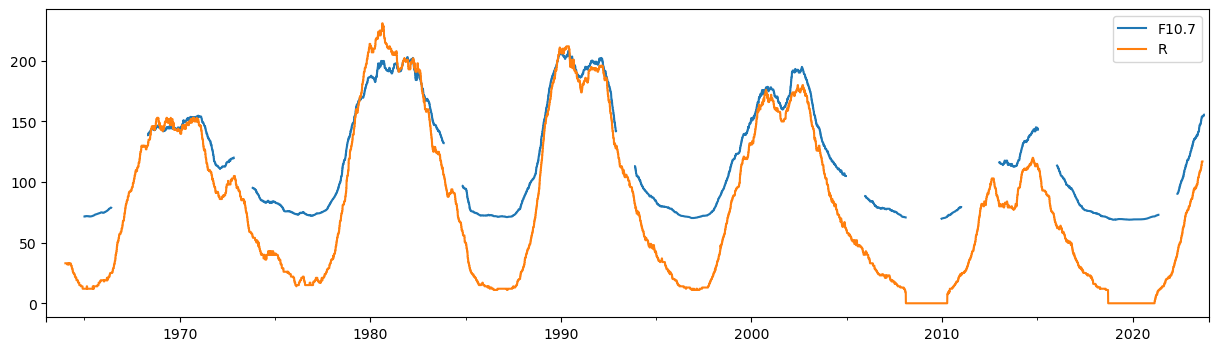

In [19]:
# We can also use the .rolling() method to do this. 
# Here we construct a moving median filter:
df[["F10.7", "R"]].rolling(24*365).median().plot(figsize=(15,4))

In [ ]:
# Note that rolling calculations take the size of the window as the argument, 
# whereas resampling takes a frequency specifier as the argument

In [ ]:
#  Also note that there are some gaps in the F10.7 time series since by 
# default no gaps are allowed within each window calculated.
# This behaviour can be changed with the min_periods argument.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

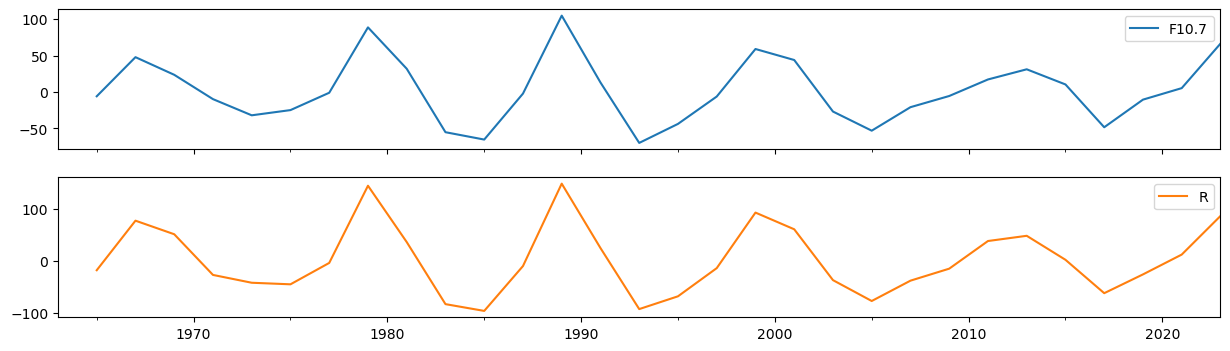

In [20]:
# Differencing is often a useful tool which can be part of time series algorithms.
# See for example how we can use smoothing and differencing to more clearly isolate the periodic signal:
df[["F10.7", "R"]].resample("2y").median().diff().plot(subplots=True, figsize=(15,4))

## Identifying periodicity and correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

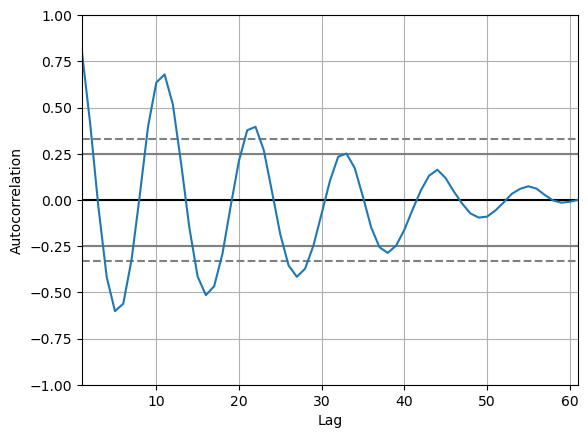

In [21]:
# We can see by eye that there is an approximately 10 year cycle in R and F10.7. 
# A handy high level tool to identify this periodicity is pandas.plotting.autocorrelation_plot():
pd.plotting.autocorrelation_plot(df["R"].resample("1y").median())

In [ ]:
# This produces an autocorrelation plot: the correlation of a time series with
# itself at a range of lag times. We have applied it to the downsampled yearly
# time series which makes the calculation a lot quicker. 
# Since the cadence of the time series is one year, the “Lag” axis is 
# measured in years. The first peak (after a lag of 0) is around 11 years, 
# meaning that the series correlates well with itself at a lag time of 11 years.

# SEQUENCES

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
data1 = pd.read_csv('global-land-TAVG-Trend.txt', comment='%', skiprows=[0, 1], header=None, error_bad_lines=False, delim_whitespace =True)

/var/folders/h3/cyrs85856qq55m7y7mmnbp7w0000gn/T/ipykernel_4182/1429823647.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv('global-land-TAVG-Trend.txt', comment='%', skiprows=[0, 1], header=None, error_bad_lines=False, delim_whitespace =True)


In [24]:
data1.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1743,11,-1.131,2.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data1.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11
3236,2013,7,0.671,0.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,2013,8,0.919,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,2013,9,1.950,1.147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data1.shape

(3239, 12)

In [27]:
data1.columns= ['Year', 'Month', 'MonAno', 'MonUnc', 'AnAno', 'AnUnc', 'FYAno', 'FYUnc', 'TYAno', 'TYUnc', 'WYAno', 'WYUnc']

In [28]:
data1.dtypes

Year        int64
Month       int64
MonAno    float64
MonUnc    float64
AnAno     float64
AnUnc     float64
FYAno     float64
FYUnc     float64
TYAno     float64
TYUnc     float64
WYAno     float64
WYUnc     float64
dtype: object

In [29]:
data1.index = pd.to_datetime(['{}-{}'.format(y, m) for y, m in zip(data1.iloc[:,0], data1.iloc[:,1])])
data1.head()

,Year,Month,MonAno,MonUnc,AnAno,AnUnc,FYAno,FYUnc,TYAno,TYUnc,WYAno,WYUnc
1743-11-01,1743,11,-1.131,2.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743-12-01,1743,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-01-01,1744,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-02-01,1744,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-03-01,1744,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data1 = data1.drop(columns=['Year','Month'])
data1.head()

,MonAno,MonUnc,AnAno,AnUnc,FYAno,FYUnc,TYAno,TYUnc,WYAno,WYUnc
1743-11-01,-1.131,2.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


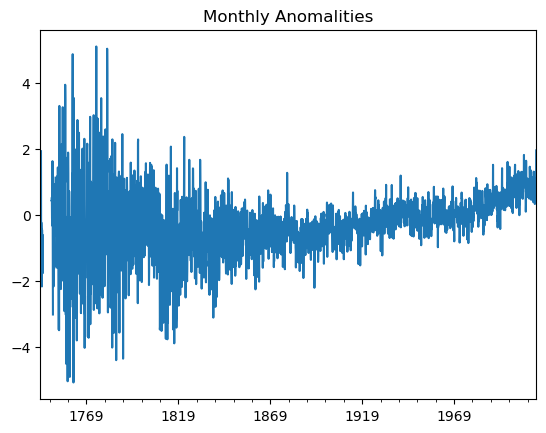

In [31]:
data1.MonAno.plot(title = 'Monthly Anomalities')
plt.show()

<AxesSubplot:title={'center':'Monthly Anomalities - Resampled'}>

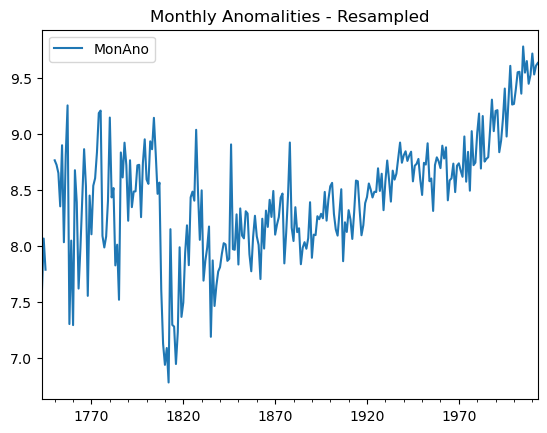

In [32]:
data2 = data1
data2.MonAno = data2.MonAno + 8.7
data2[["MonAno"]].resample("1y").median().plot(title = 'Monthly Anomalities - Resampled')

In [ ]:
data2[["MonAno"]].rolling(12).median().plot(title = 'Monthly Anomalities - Resampled2')
data2[["MonAno"]].rolling(12*10).median().plot()

In [ ]:
y1 = data2[["MonAno"]].rolling(12).median()
y2 = data2[["MonAno"]].rolling(12*10).median()
plt.figure()
plt.plot(y1.index,y1,'r', label='12 Month Rolling Average')
plt.plot(y2.index,y2,'k', label='10 Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (C)')
plt.legend()